We illustrate how we might write a class that indexes like numpy arrays and torch tensors.

In [1]:
from torch import tensor
from fastai.vision.all import *

pickle_path = URLs.path('mnist_png')/'mnist_png.pkl'
path = untar_data(URLs.MNIST)/'training'

if not pickle_path.exists():
    pickle_path.parent.mkdir(parents=True, exist_ok=True)
    ds = DataBlock(
        blocks = (ImageBlock(PILImageBW), CategoryBlock),
        get_items = get_image_files,
        get_y = parent_label,
        splitter = RandomSplitter(1/6, seed=0)
    ).datasets(path)

    xs, ys = zip(*ds.train, *ds.valid)
    xs = np.stack(L(map(lambda x: np.array(x, dtype=np.float32).reshape(-1), xs))) / 255.
    ys = np.array(ys, dtype=np.int64)

    x_train, x_valid = xs[:len(ds.train)], xs[len(ds.train):]
    y_train, y_valid = ys[:len(ds.train)], ys[len(ds.train):]

    save_pickle(pickle_path, [x_train, y_train, x_valid, y_valid])

    del ds, xs, ys, x_train, y_train, x_valid, y_valid

x_train, y_train, x_valid, y_valid = load_pickle(pickle_path)

Inspecting a tensor.

In [2]:
tensor([1, 2, 3]), tensor([1, 2, 3]).shape, tensor([1, 2, 3]).type()

(tensor([1, 2, 3]), torch.Size([3]), 'torch.LongTensor')

In [3]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
x_train.shape, x_train.type()


(torch.Size([50000, 784]), 'torch.FloatTensor')

Reshaping. `-1` means to infer the count in that dimension from the others.

In [4]:
imgs = x_train.reshape((-1,28,28))
imgs.shape


torch.Size([50000, 28, 28])

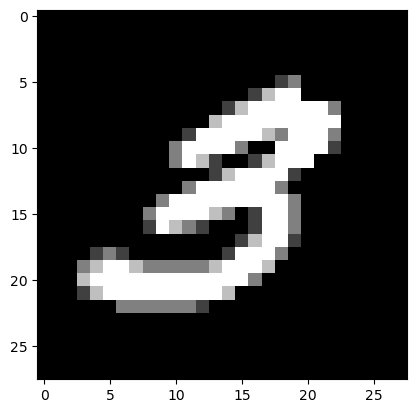

In [5]:
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.cm as cm

plt.imshow(imgs[0], cmap=cm.gray)

Indexing into the (0-indexed) 20-th row (top to bottom) and 15-th column (left to right)

In [6]:
imgs[0,20,15]


tensor(1.)

`n` is the number of records, `c` is the number of features, `y_train` is the vector of numbers

In [7]:
n, c = x_train.shape
y_train, y_train.shape

(tensor([3, 8, 7,  ..., 4, 9, 0]), torch.Size([50000]))

In [8]:
min(y_train), max(y_train)


(tensor(0), tensor(9))

In [9]:
y_train.min(), y_train.max()


(tensor(0), tensor(9))